In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
class MultiArmedBandit:
  def __init__(self,n_arms,epsilon=0.1):
    self.n_arms = n_arms
    self.counts = np.zeros(n_arms)
    self.values = np.zeros(n_arms)
    self.q_true = np.random.normal(0,1,n_arms)
    self.t = 0
    self.epsilon = epsilon
  
  def pick_greedy_epsilon(self):
    if np.random.rand() < self.epsilon:
      return np.random.choice(self.n_arms)
    else:
      return np.argmax(self.values)

  def pick_ucb(self):
    ucb_values = self.values + 2*np.sqrt(np.log(max(self.t,1))/(self.counts + 1e-5))
    return np.argmax(ucb_values)
  
  def update(self,action,reward):
    self.counts[action] += 1
    self.t += 1
    self.values[action] = self.values[action] + (reward - self.values[action])/self.counts[action]

  def run_epsilon_greedy(self,n_steps):
    rewards = np.zeros(n_steps)
    for i in range(n_steps):
      action = self.pick_greedy_epsilon()
      reward = np.random.normal(self.q_true[action],1)
      self.update(action,reward)
      rewards[i] = reward
    return rewards
  
  def run_ucb(self,n_steps):
    rewards = np.zeros(n_steps)
    for i in range(n_steps):
      action = self.pick_ucb()
      reward = np.random.normal(self.q_true[action],1)
      self.update(action,reward)
      rewards[i] = reward
    return rewards
  
  def run_optimistic_initial_values(self,n_steps):
    rewards = np.zeros(n_steps)
    self.values = np.ones(self.n_arms)*5
    for i in range(n_steps):
      action = self.pick_greedy_epsilon()
      reward = np.random.normal(self.q_true[action],1)
      self.update(action,reward)
      rewards[i] = reward
    return rewards
  






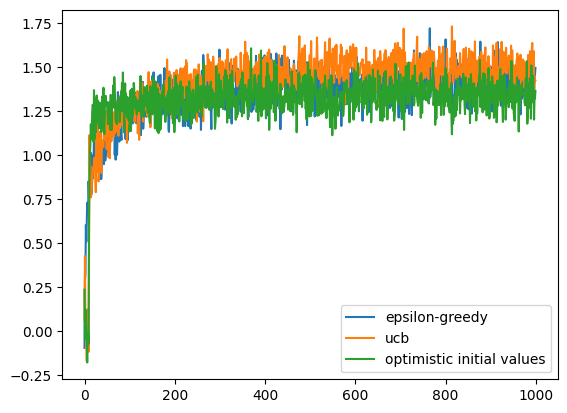

In [24]:
# Test
n_arms = 10
n_steps = 1000
n_runs = 200
rewards_eps = np.zeros((n_runs,n_steps))
for i in range(n_runs):
  bandit = MultiArmedBandit(n_arms)
  rewards_eps[i] = bandit.run_epsilon_greedy(n_steps)


rewards_ucb = np.zeros((n_runs,n_steps))
for i in range(n_runs):
  bandit = MultiArmedBandit(n_arms)
  rewards_ucb[i] = bandit.run_ucb(n_steps)


rewards_oiv = np.zeros((n_runs,n_steps))
for i in range(n_runs):
  bandit = MultiArmedBandit(n_arms)
  rewards_oiv[i] = bandit.run_optimistic_initial_values(n_steps)


plt.plot(np.mean(rewards_eps,axis=0),label='epsilon-greedy')
plt.plot(np.mean(rewards_ucb,axis=0),label='ucb')
plt.plot(np.mean(rewards_oiv,axis=0),label='optimistic initial values')
plt.legend()
plt.show()
